In [1]:
import sys
if "../" not in sys.path:
  sys.path.append("../")

import numpy as np
import gym
import sklearn.pipeline
import sklearn.preprocessing
from sklearn.kernel_approximation import RBFSampler

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

from utils import plotting

from q_learning_fa import Estimator, q_learning_fa

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
env = gym.envs.make("MountainCar-v0")

[2017-01-30 15:56:11,953] Making new env: MountainCar-v0


In [3]:
# Feature Preprocessing: Normalize to zero mean and unit variance
# We use a few samples from the observation space to do this
observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(observation_examples)

# Used to converte a state to a featurizes represenation.
# We use RBF kernels with different variances to cover different parts of the space
featurizer = sklearn.pipeline.FeatureUnion([
        ("rbf1", RBFSampler(gamma=5.0, n_components=100)),
        ("rbf2", RBFSampler(gamma=2.0, n_components=100)),
        ("rbf3", RBFSampler(gamma=1.0, n_components=100)),
        ("rbf4", RBFSampler(gamma=0.5, n_components=100))
        ])
featurizer.fit(scaler.transform(observation_examples))

FeatureUnion(n_jobs=1,
       transformer_list=[('rbf1', RBFSampler(gamma=5.0, n_components=100, random_state=None)), ('rbf2', RBFSampler(gamma=2.0, n_components=100, random_state=None)), ('rbf3', RBFSampler(gamma=1.0, n_components=100, random_state=None)), ('rbf4', RBFSampler(gamma=0.5, n_components=100, random_state=None))],
       transformer_weights=None)

In [4]:
estimator = Estimator(env, scaler, featurizer)

In [5]:
%%time
stats = q_learning_fa(env, estimator, 100, epsilon=0.0)

CPU times: user 1min 6s, sys: 323 ms, total: 1min 6s
Wall time: 1min 6s


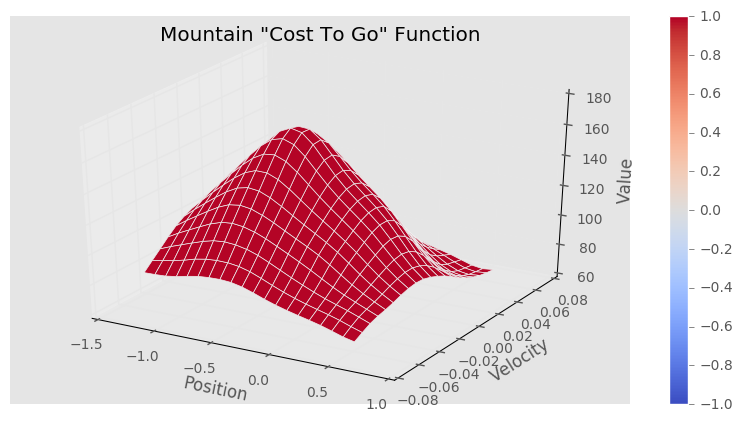

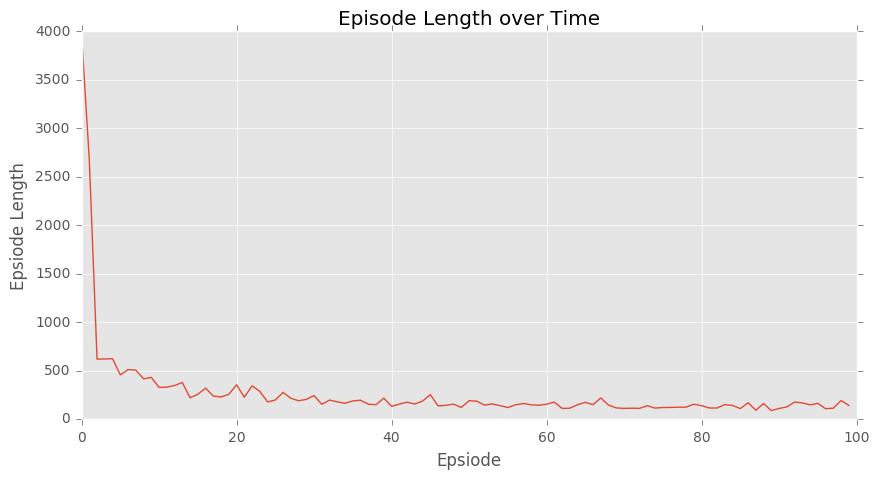

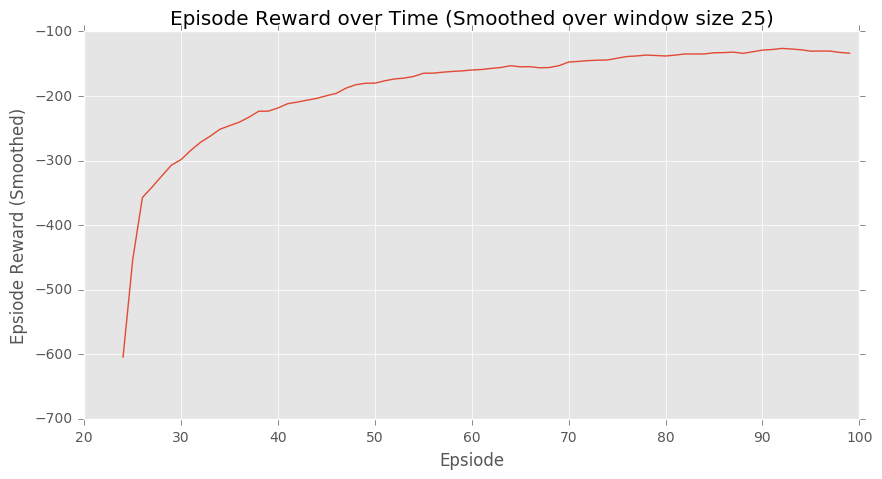

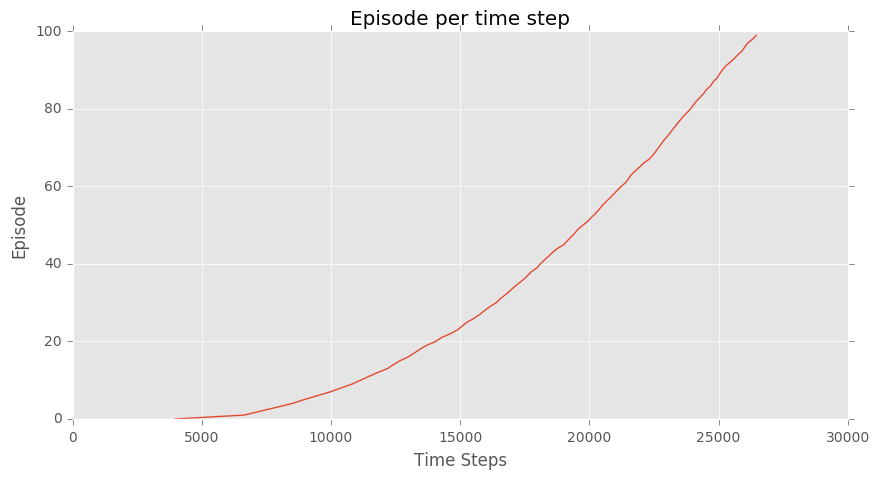

(<matplotlib.figure.Figure at 0x1112a4710>,
 <matplotlib.figure.Figure at 0x1149f9ef0>)

In [6]:
plotting.plot_cost_to_go_mountain_car(env, estimator)
plotting.plot_episode_stats(stats, smoothing_window=25)